<a href="https://colab.research.google.com/github/phantasticphenomenon/Hello-World/blob/master/Copy_of_Kickstarter_Projects_Analysis_Group_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
Welcome, guys!
I wrote a couple of lines of code up here at the top that uses an API to 
download the data direcly from Kaggle and into the COLAB notebook
That way we don't have to copy-paste our work in and out of COLAB all the time
to work with the data locally (from our computers)
Y'all should be able to directly run all the code from here and have it work 
seamlessly
I'll make sure the code is clean before I'm done. If you have any trouble 
running it its likely an API problem
Contact me on What's App and I'll help you out
-Nadia
'''

#Upload Kaggle API from local
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"nadiakrieger","key":"872d86bf9faa31dd8ce8c8f48c4b5d4d"}'}

In [0]:
# Move API client into ~/.kaggle directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

#Download kickstarter dataset
!kaggle datasets download -d kemical/kickstarter-projects

#unzip the dataset
!unzip kickstarter-projects.zip

#show first five rows of kickstarter dataset
!head ks-projects-201801.csv

#End Nadia/API Code

kickstarter-projects.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  kickstarter-projects.zip
replace ks-projects-201612.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ks-projects-201612.csv  
replace ks-projects-201801.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ks-projects-201801.csv  
ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Co

In [0]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Prevents old/out of date Python warnings form appearing
from pandas import Series, DataFrame

#Import the .csv file into DataFrame and separate by commas
df = pd.read_csv('ks-projects-201801.csv', sep = ',', parse_dates= ['deadline','launched'],header = 0)

#Converting Launched column into a Date/Time format to prevent having different formats for comparing start and end dates
df["launched"]= df["launched"].astype(str)
df["launched"] = df["launched"].str[:10]
df["launched"]= df["launched"].astype(str)
df["launched"] = pd.to_datetime(df["launched"])

#Created new DataFrame df2. Dropped the usd_pledged column due to innacuracies in conversion rates. Dropped any Null values
df2 = df.drop(index =[166851, 307234, 309991, 338931], columns=['usd pledged'])

#Created column to determine the length of each Kickstarter Project by subtracting start date form end date.
df2["campaign_length_in_days"] = df2["deadline"].sub(df2["launched"], axis=0)
df2["campaign_length_in_days"] = df2["campaign_length_in_days"] / np.timedelta64(1, 'D')

#Determines actual day of the week Sun-Sat of both launch and end dates. Adds 2 columns for each respective.
df2["day_started"] = df2["launched"].dt.day_name()
df2["day_ended"] = df2["deadline"].dt.day_name()

#Creates a new column to determine average dollar donation for each backer. Replaces any null values with 0. Rounds values to 2 decimal places.
'''Add the average donation'''
df2["average_donation_per_backer"] = df2["usd_pledged_real"]/df2["backers"]
df2["average_donation_per_backer"].fillna(0, inplace=True)
df2["average_donation_per_backer"].astype(float)
df2 = df2.round({'average_donation_per_backer': 2})

df2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,campaign_length_in_days,day_started,day_ended,average_donation_per_backer
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,0.0,1533.95,59.0,Tuesday,Friday,0.00
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,15,US,2421.0,30000.00,60.0,Saturday,Wednesday,161.40
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,220.0,45000.00,45.0,Saturday,Tuesday,73.33
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1,US,1.0,5000.00,30.0,Saturday,Monday,1.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14,US,1283.0,19500.00,56.0,Saturday,Saturday,91.64


Text(0.5, 1.0, 'Number of Succesful Campaigns by Main Category')

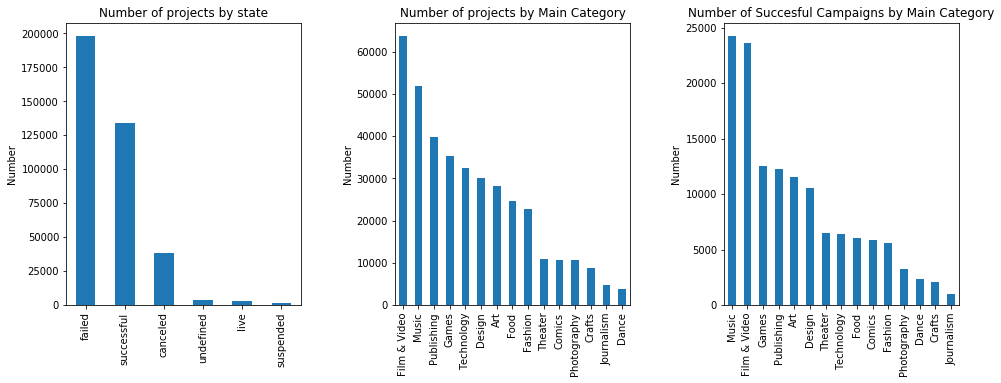

In [0]:
# Bar plot of projects by their state/status
fig = plt.figure(figsize=(16,4))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)


#Total counts of each projects indicated state (i.e success, fail or others)
ax1 = plt.subplot2grid ((1,3),(0,0))  # 3 columns, 1 row.
df2.state.value_counts().plot(kind='bar', rot=90)
ax1.set_ylabel('Number')
plt.title('Number of projects by state')

#Shows total number of projects for each primary category of the project. Takes into account any state of the project
ax2 = plt.subplot2grid ((1,3),(0,1))
df2.main_category.value_counts().plot(kind = 'bar', rot=90)
ax2.set_ylabel ('Number')
plt.title('Number of projects by Main Category')

#Shows total number of projects for each primary category of the project. Only shows successful projects
ax3 = plt.subplot2grid((1,3),(0,2))
df2.main_category[df2.state == 'successful'].value_counts().plot(kind = 'bar', rot =90)
ax3.set_ylabel ('Number')
plt.title('Number of Succesful Campaigns by Main Category')

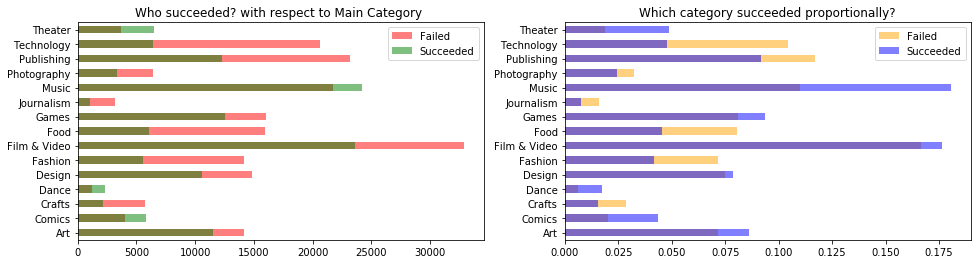

In [0]:
#Bar Plots displaying Success state data.
fig2 = plt.figure(figsize=(16,4))

#Creates 2 DataFrames with the total number of successful and failed projects form each Kickstarter project category.
df_succeed = df2.main_category[df2.state == 'successful'].value_counts().sort_index()
df_failed = df2.main_category[df2.state == 'failed'].value_counts().sort_index()

#Creates an overlay of total number of successful and failed projects form each category. Any category with more failed project will have a red top.
ax1 = fig2.add_subplot(121)
df_failed.plot(kind='barh', color = 'red', label='Failed', alpha=0.5)
df_succeed.plot(kind='barh', color='green',label='Succeeded', alpha=0.50)
plt.title("Who succeeded? with respect to Main Category "); 
plt.legend(loc='best')

#Creates and overlay of successful and failed projects from each category based on their percentage compared to total Kickstarter projects.
ax2 = fig2.add_subplot(122)
(df_failed/float(df_failed.sum())).plot(kind='barh', color='orange', label='Failed', alpha=0.50)  
(df_succeed/float(df_succeed.sum())).plot(kind='barh', color='blue',label='Succeeded', alpha=0.50)
plt.title("Which category succeeded proportionally?"); 
plt.legend(loc='best')

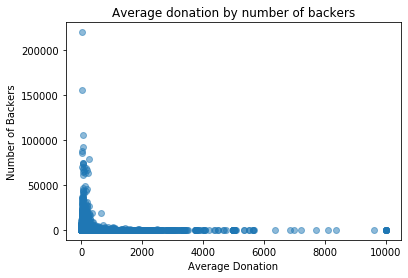

In [0]:
# Scatterplot of average donations by number of backers per project
plt.scatter(df2.average_donation_per_backer, df2.backers,alpha=0.5)
plt.title('Average donation by number of backers')
plt.xlabel('Average Donation')
plt.ylabel('Number of Backers')
plt.show()

In [0]:
#Created new DataFrame df_main. Removed unecessary/redundant columns to make DataFrame easier to perform analysis on.
#Removed Currency, pledged, goal, name, ID, currency and category columns.
df_main = df2.drop(columns=['name','ID','category','currency','pledged','goal'])
df_main.head()

,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,campaign_length_in_days,day_started,day_ended,average_donation_per_backer
0,Publishing,2015-10-09,2015-08-11,failed,0,GB,0.0,1533.95,59.0,Tuesday,Friday,0.00
1,Film & Video,2017-11-01,2017-09-02,failed,15,US,2421.0,30000.00,60.0,Saturday,Wednesday,161.40
2,Film & Video,2013-02-26,2013-01-12,failed,3,US,220.0,45000.00,45.0,Saturday,Tuesday,73.33
3,Music,2012-04-16,2012-03-17,failed,1,US,1.0,5000.00,30.0,Saturday,Monday,1.00
4,Film & Video,2015-08-29,2015-07-04,canceled,14,US,1283.0,19500.00,56.0,Saturday,Saturday,91.64


In [0]:
#General information about updated DataFrame df_main
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378657 entries, 0 to 378660
Data columns (total 12 columns):
main_category                  378657 non-null object
deadline                       378657 non-null datetime64[ns]
launched                       378657 non-null datetime64[ns]
state                          378657 non-null object
backers                        378657 non-null int64
country                        378657 non-null object
usd_pledged_real               378657 non-null float64
usd_goal_real                  378657 non-null float64
campaign_length_in_days        378657 non-null float64
day_started                    378657 non-null object
day_ended                      378657 non-null object
average_donation_per_backer    378657 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 37.6+ MB


In [0]:
#Number of rows with a Cancelled state
df_main[df_main['state'] == 'canceled'].count()

main_category                  38779
deadline                       38779
launched                       38779
state                          38779
backers                        38779
country                        38779
usd_pledged_real               38779
usd_goal_real                  38779
campaign_length_in_days        38779
day_started                    38779
day_ended                      38779
average_donation_per_backer    38779
dtype: int64

In [0]:
#Create a dataframe that contains only the canceled kickstarter projects
df_canceled = df_main[df_main['state'] == 'canceled']

#Count the number of canceled kickstarter projects by counting the rows in
#the new dataframe, print results
print('The number of canceled kickstarter projects in the dataset is ' + 
      str(df_canceled.count()[0]))

#Calculate the proportion of canceled kickstarter projects in the full dataframe
#in percentage, print results
print('The percentage of cancelled kickstarter projects in the full dataset is '
+ str(round((df_canceled.count()[0]/df_main.count()[0]*100),2)) + '%')

#Use a conditional statement to count the number of canceled kickstarter 
#projects where the amount pledged is equal to or exceeds the goal of the 
#kickstarter campaign, print results
print('The number of canceled kickstarter projects where the amount pledged is \
equal to or exceeds the goal of the project is ' + str(df_canceled[df_canceled\
['usd_pledged_real'] >= df_canceled['usd_goal_real']].count()[0]))

#Calculate the proportion of canceled kickstarter projects that were able to 
#fundraise their goaled amount compared to the full number of canceled projects
#in percentage, print result
print('The percentage of canceled kickstarter projects where the amount pledged\
is equal to or exceeds the goal of the project compared to the full number of \
cancelled projects is is ' + str(round((df_canceled[df_canceled\
['usd_pledged_real'] >= df_canceled['usd_goal_real']].count()[0]/df_canceled.\
count()[0]),2)) + '%')


The number of canceled kickstarter projects in the dataset is 38779
The percentage of cancelled kickstarter projects in the full dataset is 10.24%
The number of canceled kickstarter projects where the amount pledged is equal to or exceeds the goal of the project is 698
The percentage of canceled kickstarter projects where the amount pledgedis equal to or exceeds the goal of the project compared to the full number of cancelled projects is is 0.02%


From the results printed above, you can see that the number of canceled 
projects that exceeded the fundraising goal account for 0.02 per cent of the
canceled dataset and less than 0.002 per cent of the full dataset.As we are not able to account for the reason that these projects were cancelled
despite meeting the fundraising goal, we choose to drop them from our data. 

In [0]:
#List all the unique categories under parameter 'state'.
print(df_main.state.unique())

['failed' 'canceled' 'successful' 'live' 'undefined' 'suspended']


In [0]:
#Calculates the  number of live, undefined and suspended kickstarter projects
print(df_main[df_main['state'] == 'live'].count()[0])
print(df_main[df_main['state'] == 'undefined'].count()[0])
print(df_main[df_main['state'] == 'suspended'].count()[0])


2799
3562
1845


As the size of the full dataset is 378657 rows, all of these categories 
under the 'state' paremeter account for less than 0.01% of the full dataset
each. As this is not a significant amount of data lost, and as our data is
not sufficient to qualitatively make sense of these states, we choose to drop
them from the dataset

In [0]:
#Drop rows where state is live, undefined, suspended, and rows where state is 
#canceled and the amount of money pledged is equal to or exceeds the goal
#fromt df_main
df_main = df_main[df_main['state'] != 'live']
df_main = df_main[df_main['state'] != 'undefined']
df_main = df_main[df_main['state'] != 'suspended']
df_main = df_main.drop(df_main[(df_main['state'] == 'canceled') & \
(df_main['usd_pledged_real'] >= df_main['usd_goal_real'])].index)

#change all 'canceled' values to 'failed'
df_main.loc[(df_main.state == 'canceled'),'state']='failed'

#change all 'failed' values to 0 and 'succesful' to 1
df_main.loc[(df_main.state == 'failed'),'state']=0
df_main.loc[(df_main.state == 'successful'),'state']=1
df_main.head()

,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,campaign_length_in_days,day_started,day_ended,average_donation_per_backer
0,Publishing,2015-10-09,2015-08-11,0,0,GB,0.0,1533.95,59.0,Tuesday,Friday,0.00
1,Film & Video,2017-11-01,2017-09-02,0,15,US,2421.0,30000.00,60.0,Saturday,Wednesday,161.40
2,Film & Video,2013-02-26,2013-01-12,0,3,US,220.0,45000.00,45.0,Saturday,Tuesday,73.33
3,Music,2012-04-16,2012-03-17,0,1,US,1.0,5000.00,30.0,Saturday,Monday,1.00
4,Film & Video,2015-08-29,2015-07-04,0,14,US,1283.0,19500.00,56.0,Saturday,Saturday,91.64


In [0]:
#Checking statistical values of updated DatFrame
df_main.describe()

#The NaN standard deviation is likely a result of the inf values in the data.
#NaN and INF values are further investigated below to determine cause.

,state,backers,usd_pledged_real,usd_goal_real,campaign_length_in_days,average_donation_per_backer
count,369753.000000,369753.000000,3.697530e+05,3.697530e+05,369753.000000,369753.00
mean,0.362285,106.778241,9.119813e+03,4.513858e+04,34.405814,inf
std,0.480661,915.611763,9.169402e+04,1.129333e+06,60.744066,NaN
min,0.000000,0.000000,0.000000e+00,1.000000e-02,1.000000,0.00
25%,0.000000,2.000000,3.200000e+01,2.000000e+03,30.000000,14.36
50%,0.000000,12.000000,6.304900e+02,5.500000e+03,30.000000,40.61
75%,1.000000,57.000000,4.065350e+03,1.597495e+04,37.000000,76.03
max,1.000000,219382.000000,2.033899e+07,1.663614e+08,14867.000000,inf


In [0]:
#count if backers = 0 is the same number as inf
#To count the 'inf's we have to convert the column to a NumPy array
array = df2['average_donation_per_backer'].values
#count the infs
np_bool = np.isinf(array)
#convert the np array back to a dataframe
df_bool = pd.DataFrame(np_bool)

#count the amount of inf's (which are now represented as 'True' in a boolean df)
print(df_bool.sum()[0])
#count the number of rows where there are zero backers,
#to make sure that the inf results are not a product of dividing by zero
print(df2[df2['backers'] == 0].count()[0])

#since the numbers don't add up, lets see if the inf values are the result
#of dividing zero by zero, or dividing a nonzero number by zero

#In this line lets make a new dataframe that only contains rows where
#the number of backers is zero
df_test = df2.drop(df2[(df2['backers'] != 0)].index)

#now count the number of rows where theres zero usd pledged, and nonzero
#usd pledged
print(df_test[df_test['usd_pledged_real'] == 0].count()[0])
print(df_test[df_test['usd_pledged_real'] != 0].count()[0])

#for some reason, we have rows where the amount of backers is zero, but the 
#number of dollars pledged in usd is positive
#this makes no sense.
#luckily, the number of rows where this occurs is only 3082, which is less than
#0.01 per cent of our data
#In conclusion I will drop these rows

#For clarity, we hunted down an instance of one of these rows
#See "Duncan Woods"
df_test_2 = df2[326:330]
df_test_2

#Dropping the rows here:
df_main = df_main.drop(df_main[(df_main['backers'] == 0) & (df_main['usd_pledged_real'] != 0)].index)
'''
df_main = df_main.drop(df_main[(df_main['state'] == 'canceled') & \
(df_main['usd_pledged_real'] >= df_main['usd_goal_real'])].index)
'''
df_main.describe()

3082
55608
52526
3082


,state,backers,usd_pledged_real,usd_goal_real,campaign_length_in_days,average_donation_per_backer
count,369553.000000,369553.000000,3.695530e+05,3.695530e+05,369553.000000,369553.000000
mean,0.362197,106.836029,9.115826e+03,4.515082e+04,34.406521,65.050900
std,0.480636,915.856122,9.160678e+04,1.129632e+06,60.759913,136.690144
min,0.000000,0.000000,0.000000e+00,1.000000e-02,1.000000,0.000000
25%,0.000000,2.000000,3.200000e+01,2.000000e+03,30.000000,14.330000
50%,0.000000,12.000000,6.300000e+02,5.500000e+03,30.000000,40.580000
75%,1.000000,57.000000,4.065000e+03,1.599526e+04,37.000000,75.940000
max,1.000000,219382.000000,2.033899e+07,1.663614e+08,14867.000000,10000.000000


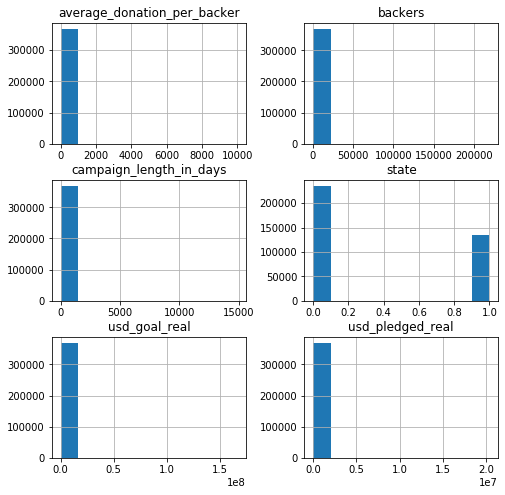

In [0]:
#plot the histograms
df_main.hist(figsize=(8,8))
plt.show()

#looks like there's a lot of outliers. Let's see if we can get rid of any

In [0]:
#Looks like only 20 rows have more than 50,000 backers. I'm gonna dump these to 
#see if I can make the histogram work
df_main[df_main['backers'] > 50000].count()

main_category                  20
deadline                       20
launched                       20
state                          20
backers                        20
country                        20
usd_pledged_real               20
usd_goal_real                  20
campaign_length_in_days        20
day_started                    20
day_ended                      20
average_donation_per_backer    20
dtype: int64

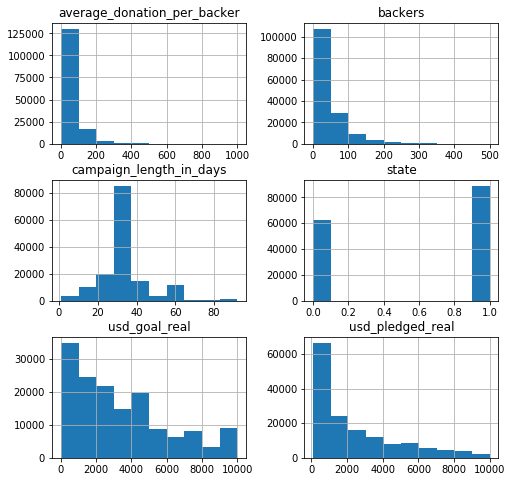

In [0]:
df_main2 = df_main.drop(df_main[(df_main['backers'] > 500)].index)
df_main2 = df_main2.drop(df_main2[(df_main2['backers'] < 1)].index)
df_main2 = df_main2.drop(df_main2[(df_main2['usd_goal_real'] > 10000)].index)
df_main2 = df_main2.drop(df_main2[(df_main2['usd_pledged_real'] > 10000)].index)
df_main2 = df_main2.drop(df_main2[(df_main2['usd_pledged_real'] < 100)].index)
#df_main2 = df_main2.drop(df_main2[(df_main2['average_donation_per_backer'] < 1)].index)
df_main2 = df_main2.drop(df_main2[(df_main2['average_donation_per_backer'] > 1000)].index)
df_main2.hist(figsize=(8,8))
plt.show()

In [0]:
# Below is exploratory analysis around the 'canceled' state for Kickstarter projects.

In [0]:
# Count the number of Kickstarter projects by 'state'
df2.state.value_counts()

failed        197716
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64

In [0]:
# Count total number of projects by state as percent of total Kickstarter projects
df2.state.value_counts(normalize=True).mul(100)

failed        52.215065
successful    35.376607
canceled      10.241195
undefined      0.940693
live           0.739191
suspended      0.487248
Name: state, dtype: float64

10% of total population of projects are flagged as canceled. We will be running a separate analysis for that category. Below we will run Some explaratory analysis to understand which projects get canceled the most. 

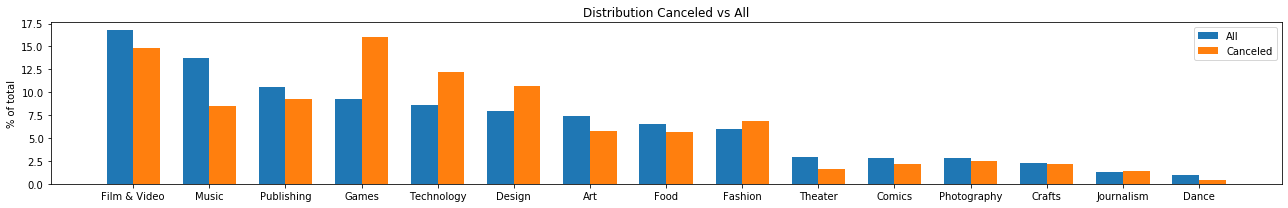

In [0]:
#Percentage of a category from overall projects and the from that amount, the percentage cancelled projects in that category.

#Created a new data frame with % of total for canceled vs all businesses

df_main_cat_tot = pd.DataFrame(df2.main_category.value_counts(normalize=True).mul(100), columns = ['main_category'])
df_main_cat_can = pd.DataFrame(df2.main_category[df2.state == 'canceled'].value_counts(normalize=True).mul(100), columns = ['main_category'])
df_main_cat = pd.merge(df_main_cat_tot, df_main_cat_can, left_index=True, right_index=True)

#Visualize the all % for a category next to percent of cancelled projects in the category.
x = np.arange(len(df_main_cat.index)) 
width = 0.35

fig, ax = plt.subplots(figsize=(18,3))
ax.bar(x - width/2, df_main_cat.main_category_x, width, label='All')
ax.bar(x + width/2, df_main_cat.main_category_y, width, label='Canceled')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of total')
ax.set_title('Distribution Canceled vs All')
ax.set_xticks(x)
ax.set_xticklabels(df_main_cat.index)
ax.legend()

fig.tight_layout()

plt.show()

Games, Technology and Design had higher cancellation rates comared to the overall percentage of projects of that category.

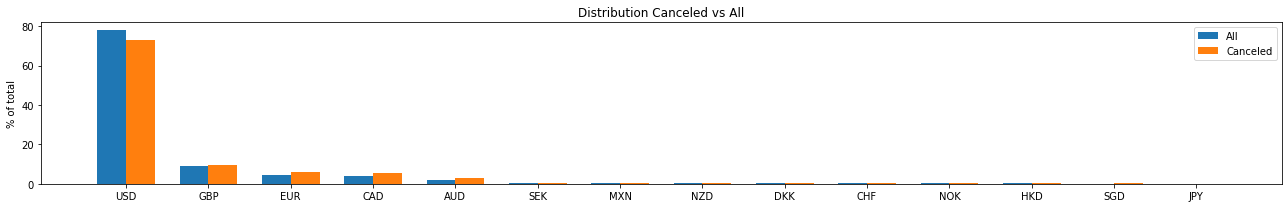

In [0]:
##Comparing project currencies to see if the currency of the kickstarter project had different effects on the cancellation percentage

#Create a new data frame with % of total projects' currencies values for canceled vs all businesses

df_cur_tot = pd.DataFrame(df2.currency.value_counts(normalize=True).mul(100), columns = ['currency'])
df_cur_can = pd.DataFrame(df2.currency[df2.state == 'canceled'].value_counts(normalize=True).mul(100), columns = ['currency'])
df_cur = pd.merge(df_cur_tot, df_cur_can, left_index=True, right_index=True)

#Visualize
x = np.arange(len(df_cur.index)) 
width = 0.35

fig, ax = plt.subplots(figsize=(18,3))
ax.bar(x - width/2, df_cur.currency_x, width, label='All')
ax.bar(x + width/2, df_cur.currency_y, width, label='Canceled')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of total')
ax.set_title('Distribution Canceled vs All')
ax.set_xticks(x)
ax.set_xticklabels(df_cur.index)
ax.legend()

fig.tight_layout()

plt.show()

There is a slightly higher percentage of canceled projects with EUR, CAD and AUD as their primary currency when compared to the total percentage of overall projects.

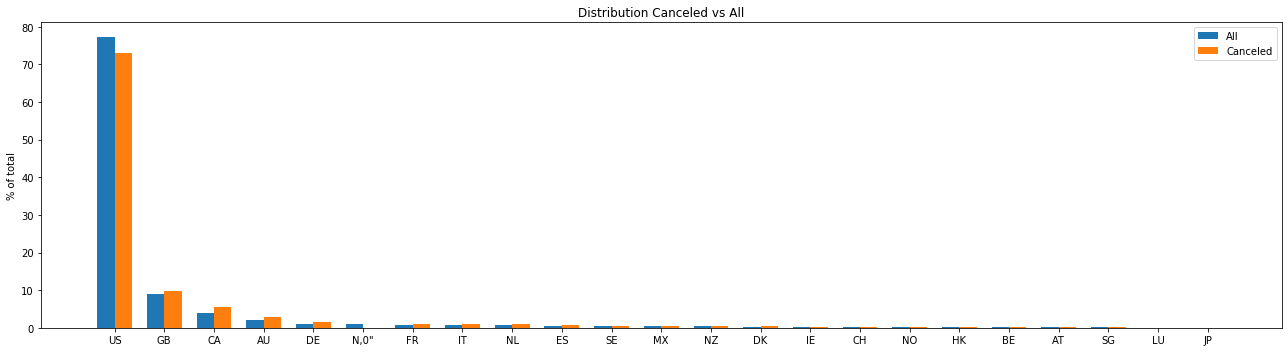

In [0]:
##Comparing projects country of origin to see if the country impacted or had a correlation on the percentage of cancelled projects

#Created a new data frame with % of each country of origin comparing to the overall failure rate.

df_coun_tot = pd.DataFrame(df2.country.value_counts(normalize=True).mul(100), columns = ['country'])
df_coun_can = pd.DataFrame(df2.country[df2.state == 'canceled'].value_counts(normalize=True).mul(100), columns = ['country'])
df_coun = pd.merge(df_coun_tot, df_coun_can, left_index=True, right_index=True)

#Visualize
x = np.arange(len(df_coun.index)) 
width = 0.35

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(x - width/2, df_coun.country_x, width, label='All')
ax.bar(x + width/2, df_coun.country_y, width, label='Canceled')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of total')
ax.set_title('Distribution Canceled vs All')
ax.set_xticks(x)
ax.set_xticklabels(df_coun.index)
ax.legend()

fig.tight_layout()

plt.show()

A higher proportion of canceled projects in Great Britain, Canada and Australia relative to their overall number of projects.

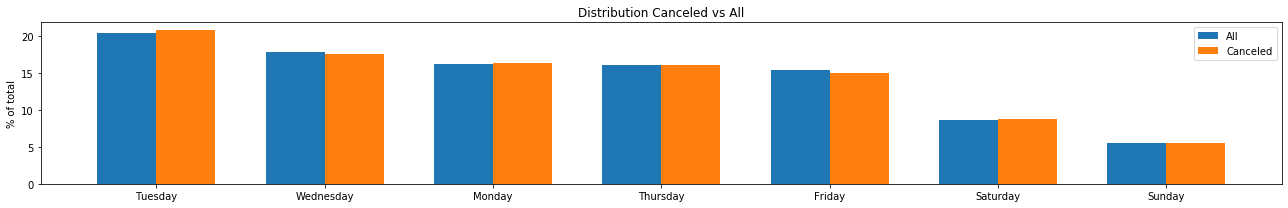

In [0]:
##Comparing projects by day of the week the Kickstarter began on against overall projects and if there is a correlation to an increase in cancelled projects.

#Created a new data frame with % of total projects and day of the week they began vs overall cancelled projects.
df_dow_tot = pd.DataFrame(df2.day_started.value_counts(normalize=True).mul(100), columns = ['day_started'])
df_dow_can = pd.DataFrame(df2.day_started[df2.state == 'canceled'].value_counts(normalize=True).mul(100), columns = ['day_started'])
df_dow = pd.merge(df_dow_tot, df_dow_can, left_index=True, right_index=True)
df_cur

#Visualize
x = np.arange(len(df_dow.index)) 
width = 0.35

fig, ax = plt.subplots(figsize=(18,3))
ax.bar(x - width/2, df_dow.day_started_x, width, label='All')
ax.bar(x + width/2, df_dow.day_started_y, width, label='Canceled')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of total')
ax.set_title('Distribution Canceled vs All')
ax.set_xticks(x)
ax.set_xticklabels(df_dow.index)
ax.legend()

fig.tight_layout()

plt.show()

There does not appear to be any notable difference between the day of the week a project starts and the percentage/likelihood it gets cancelled.

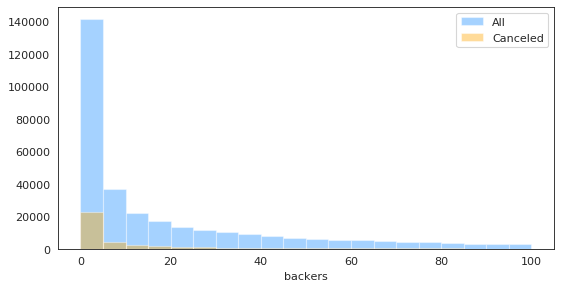

In [0]:
# Distribution of # of backers for all projects vs # of backers for canceled projects

sns.set_style("white")
bins = np.arange(0, 100 + 5, 5)

plt.figure(figsize=(8,4), dpi= 80)
sns.distplot(df2.backers, color="dodgerblue", label="All", bins=bins, kde=False)
sns.distplot(df2.backers[df2.state == 'canceled'], color="orange", label="Canceled", bins=bins, kde=False)
plt.legend();

Cancelled projects tended to have a very low number of backers with the majority of cancelled projects having under 5 backers in total.

In [0]:
"""print(.su[df3[ray = df3]'aver]ge_donat[0])
df4 = df3.drop(df3[(df3['backers'] == 0)].index)arranp
df_bool.value_counts()

df3[df3['bac.index)kers'] == 0].count()[0])#f_b
ool ='0'. pd.dataframe(
df3.state.value_counts()#df4 = df3.drop(df3['backers'] >= 0)df_bool)print(d

f3[df3['usd_pledged_real'] != 0].count()[0])
rint(df3[df3['usd_pledged_real'] ==!=].co
unt()[0])
df5

df5 = df3[321:330]
#print(df4[(d4.'usd_pledgd_real' == 0)].sum())

print("""

"print(.su[df3[ray = df3]'aver]ge_donat[0])\ndf4 = df3.drop(df3[(df3['backers'] == 0)].index)arranp\ndf_bool.value_counts()\n\ndf3[df3['bac.index)kers'] == 0].count()[0])#f_b\nool ='0'. pd.dataframe(\ndf3.state.value_counts()#df4 = df3.drop(df3['backers'] >= 0)df_bool)print(d\n\nf3[df3['usd_pledged_real'] != 0].count()[0])\nrint(df3[df3['usd_pledged_real'] ==!=].co\nunt()[0])\ndf5\n\ndf5 = df3[321:330]\n#print(df4[(d4.'usd_pledgd_real' == 0)].sum())\n\nprint("

In [0]:
# Convert Main_Category and Country, which are categorical variables into dummy variables to allow an True of False approach by being able to assign a 0 or 1 value.
dummy=pd.get_dummies(df_main['main_category'])
dummy.head()
dummy2=pd.get_dummies(df_main['country'])


In [0]:
#Concatenate dummy and dummy2 to the df_main dataframe, and renamed datafrome to df_main_dummy
df_main_dummy=pd.concat([df_main, dummy], axis=1)
df_main_dummy=pd.concat([df_main_dummy, dummy2], axis=1)

In [0]:
#Removed categorical variables 'main category' and 'country' as we have created dummy variables instead
#Dropped deadline and launched date are dropped
#Removed outliers in data. Removed rows where total project active days were over 1000 and projects where total numebr of backers is larger than 100000
df_main_dummy=df_main_dummy.drop(['main_category', 'country','average_donation_per_backer','day_started','day_ended','deadline','launched'], axis=1)
df_main_dummy.head()
df_main_dummy = df_main_dummy.drop(df_main_dummy[(df_main_dummy['campaign_length_in_days'] > 1000)].index)
df_main_dummy = df_main_dummy.drop(df_main_dummy[(df_main_dummy['backers'] > 100000)].index)

In [0]:
df_main_dummy.head()

,state,backers,usd_pledged_real,usd_goal_real,campaign_length_in_days,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,AT,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,"N,0""",NL,NO,NZ,SE,SG,US
0,0,0,0.0,1533.95,59.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,15,2421.0,30000.00,60.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,3,220.0,45000.00,45.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,1.0,5000.00,30.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,14,1283.0,19500.00,56.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
df_main_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369544 entries, 0 to 378660
Data columns (total 43 columns):
state                      369544 non-null int64
backers                    369544 non-null int64
usd_pledged_real           369544 non-null float64
usd_goal_real              369544 non-null float64
campaign_length_in_days    369544 non-null float64
Art                        369544 non-null uint8
Comics                     369544 non-null uint8
Crafts                     369544 non-null uint8
Dance                      369544 non-null uint8
Design                     369544 non-null uint8
Fashion                    369544 non-null uint8
Film & Video               369544 non-null uint8
Food                       369544 non-null uint8
Games                      369544 non-null uint8
Journalism                 369544 non-null uint8
Music                      369544 non-null uint8
Photography                369544 non-null uint8
Publishing                 369544 non-null uint8
T

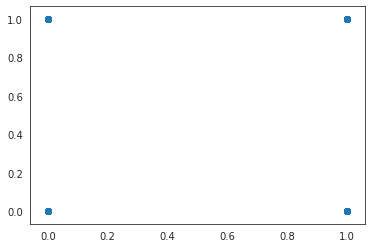

In [0]:
plt.scatter(df_main_dummy['Art'],df_main_dummy['state'])

In [0]:
##Next section is the actual modeling.  First, we split the data into a training and test data set.  

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_main_dummy[['backers', 'usd_goal_real']], 
                                                    df_main_dummy['state'], test_size=0.25)


In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277158 entries, 23423 to 53148
Data columns (total 2 columns):
backers          277158 non-null int64
usd_goal_real    277158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 6.3 MB


In [0]:
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit

In [0]:
# Fit the model
m = Logit(y_train,X_train)
m = m.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.361477
         Iterations 12


In [0]:
print(m.summary2())

                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.448      
Dependent Variable: state            AIC:              200376.3691
Date:               2019-12-05 22:57 BIC:              200397.4338
No. Observations:   277158           Log-Likelihood:   -1.0019e+05
Df Model:           1                LL-Null:          -1.8143e+05
Df Residuals:       277156           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     12.0000                                       
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
backers           0.0455   0.0002  203.9500 0.0000  0.0451  0.0459
usd_goal_real    -0.0003   0.0000 -201.5858 0.0000 -0.0003 -0.0003



In [0]:
##Confusion matrix - to be put in slides, diagonals are true positive and true negative, off diagonal are false positive (top right) and false negatives##
m.pred_table()

/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


array([[159809.,  16992.],
       [  7463.,  92894.]])

In [0]:
y_train.sum()

100357

In [0]:
n = Logit(y_test,X_test)
n = n.fit()
#predict on test data
y_pred = n.predict(X_test)

/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.359824
         Iterations 13


In [0]:
n.pred_table()

/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


array([[53325.,  5570.],
       [ 2456., 31035.]])

In [0]:
##AUC (Area under ROC curve) is almost 1.  something seems off here...see graph below. 

from sklearn import metrics 
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(false_positive_rate, true_positive_rate)
auc

0.9550322276591058

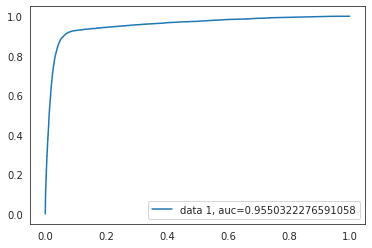

In [0]:
plt.plot(false_positive_rate,true_positive_rate,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()